# L02.2 Histogram and quantiles in Python 🐍
In this notebook we deal with histograms. Based on histograms, we develop a function for the generic determination of the so-called quantiles. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Dataset
Life time (in years) of 87 cooling units (in order of size)

In [2]:
y = np.array([0.05,0.06,0.06,0.08,0.11,0.13,0.15,0.16,0.20,
             0.22,0.24,0.25,0.25,0.28,0.31,0.34,0.37,0.42,
             0.43,0.47,0.51,0.51,0.53,0.59,0.60,0.61,0.63,
             0.68,0.75,0.76,0.76,0.79,0.87,0.88,0.88,0.92,
             0.99,1.12,1.16,1.18,1.22,1.27,1.35,1.38,1.39,
             1.42,1.45,1.49,1.53,1.69,1.74,1.81,1.83,1.87,
             1.92,1.93,2.07,2.09,2.15,2.22,2.24,2.36,2.39,
             2.41,2.47,2.49,2.53,2.64,2.69,2.83,2.90,3.21,
             3.25,3.49,3.61,3.80,3.88,4.37,4.58,4.62,5.29,
             5.68,6.02,6.23,6.71,7.82,9.93])
x = np.arange(y.size)  # Running index from 0 to y.size

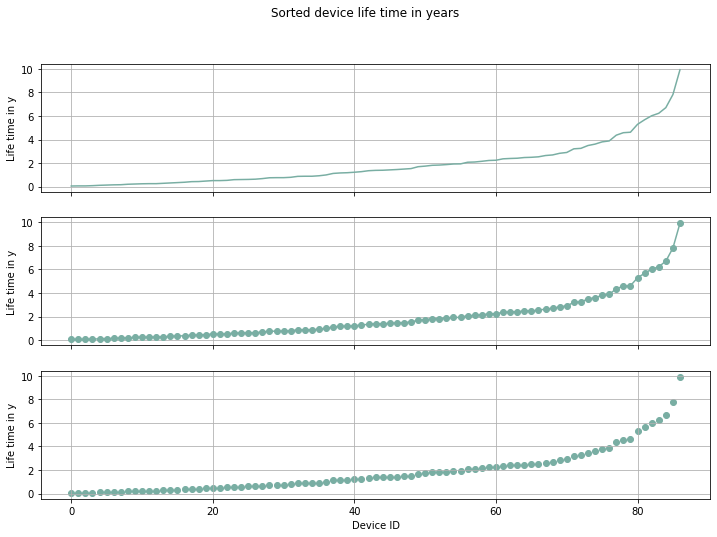

In [3]:
fig, ax = plt.subplots(3, figsize=(12,8), sharex=True)  # Three subplots in one figure. Axes are arranged as arrays. We share one common x-axis throuth all subplots.

fig.suptitle('Sorted device life time in years')  # General title of the plot

# Plot 0
ax[0].plot(x,y, color='#79AEA3')
ax[0].set_ylabel('Life time in y')
ax[0].grid()

# Plot 1
ax[1].plot(x,y, marker='o', color='#79AEA3')
ax[1].set_ylabel('Life time in y')
ax[1].grid()

# Plot 2
ax[2].scatter(x,y, color='#79AEA3')
ax[2].set_ylabel('Life time in y')
ax[2].set_xlabel('Device ID')
ax[2].grid()

#fig.savefig('cooling_devices.png', bbox_inches='tight', transparent=True)

Text(0.5, 0, 'Life time in y')

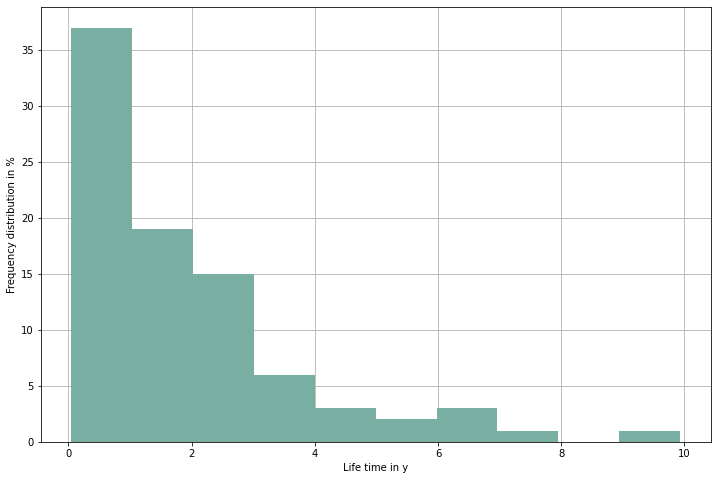

In [4]:
nbin = 10
fig = plt.figure(figsize=(12,8))
plt.hist(y, bins=nbin, zorder=10, color='#79AEA3')
plt.grid()
plt.ylabel('Frequency distribution in %')
plt.xlabel('Life time in y')

Text(0.5, 0, 'Life time in y')

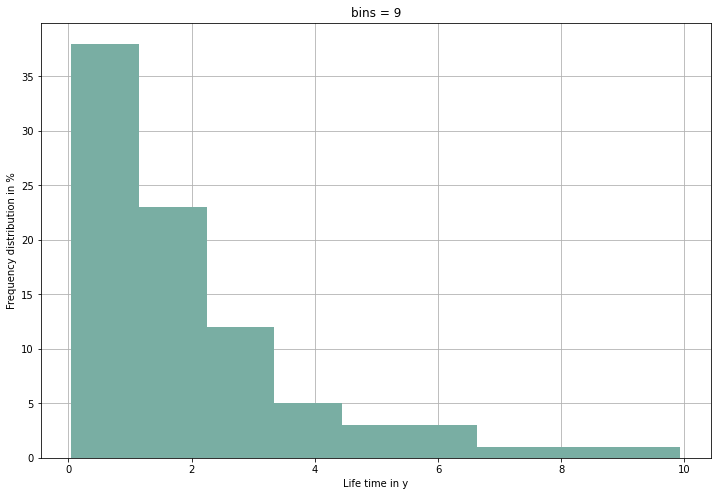

In [5]:
nbin = 9
fig = plt.figure(figsize=(12,8))
plt.title('bins = ' + str(nbin))
plt.hist(y, bins=nbin, zorder=10, color='#79AEA3')
plt.grid()
plt.ylabel('Frequency distribution in %')
plt.xlabel('Life time in y')

In [8]:
### Rice`s rule
def get_bins(x):
    return int(2*(x.size**(1.0/3.0)))

Text(0.5, 0, 'Life time in y')

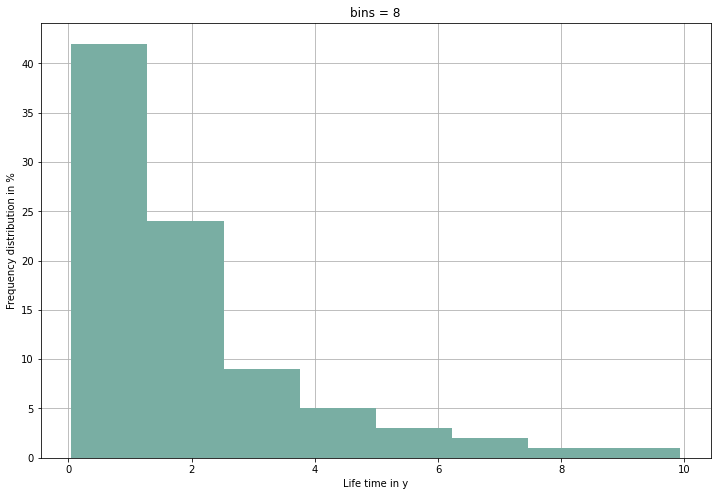

In [9]:
nbin = get_bins(y)
fig = plt.figure(figsize=(12,8))
plt.title('bins = ' + str(nbin))
plt.hist(y, bins=nbin, zorder=10, color='#79AEA3')
plt.grid()
plt.ylabel('Frequency distribution in %')
plt.xlabel('Life time in y')

## L02.2 Median and quantiles

In [10]:
x_sorted = np.sort(y)
median = x_sorted[int(x_sorted.size/2)]  # smoother: x_sorted[x_sorted.size//2] 

In [11]:
np.allclose(median, np.median(x_sorted))

True

In [12]:
def quantile(x, n=None, p=0.25):
    """
    Determines the p-quantile of a given array. \n
    :param x: input array
    :type x: np.array
    
    """
    # Checking the datatype of x. If it is numpy array, we can use it as it is. Otherwise we cast it
    if isinstance(x, np.ndarray): 
        n = x.size
    else: 
        x = np.array(x)
        n = x.size
    
    # Distinquish between even and odd case
    if (n*p) % 2 == 0:
        return 0.5*(x[int(n*p)] + x[int(n*p) + 1]), int(n*p)
    else: 
        return x[int(np.floor(n*p)) + 1], int(n*p)

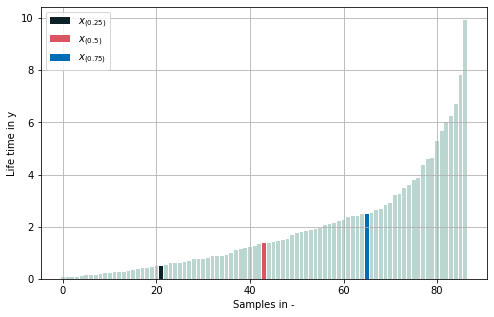

In [13]:
fig = plt.figure(figsize=(8,5))
plt.grid()
plt.bar(x, x_sorted, color='#79AEA3', alpha=0.5)

# 0.25 quantile
quant = 0.25
val, pos = quantile(x=y, p=quant)
plt.bar(x[pos], x_sorted[pos], color='#0B2027', label=r'$x_{(' + str(quant) + ')}$')

# 0.5 quantile = median
quant = 0.5
val, pos = quantile(x=y, p=quant)
plt.bar(x[pos], x_sorted[pos], color='#DB5461', label=r'$x_{(' + str(quant) + ')}$')

# 0.75 quantile
quant = 0.75
val, pos = quantile(x=y, p=quant)
plt.bar(x[pos], x_sorted[pos], color='#006EB4', label=r'$x_{(' + str(quant) + ')}$')

plt.xlabel('Samples in -')
plt.ylabel('Life time in y')
plt.legend()
#fig.savefig('median.png', bbox_inches='tight', transparent=True)